## Waste Management using CNN Model

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:02<00:00, 161MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)  # Enable eager execution

pip install opencv-python

In [ ]:
# pip install tensorflow

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1"
print("Dataset structure:")
for root, dirs, files in os.walk(dataset_path):
    print(root)


Dataset structure:
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN/R
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN/O
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST/R
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST/O
/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET
/root/.cache/kagglehub/datasets/

In [9]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"


In [10]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [11]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:07<00:00, 1593.29it/s]


In [12]:
print(data.head())  # Check if data is present
print(data.shape)   # Check if rows exist


                                               image label
0  [[[123, 120, 103], [122, 119, 102], [122, 119,...     R
1  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
2  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
3  [[[169, 174, 204], [154, 161, 190], [140, 149,...     R
4  [[[254, 254, 246], [254, 254, 246], [254, 254,...     R
(22564, 2)


In [13]:
data.shape

(22564, 2)

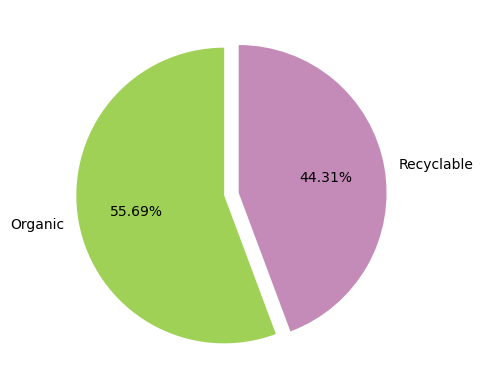

In [14]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

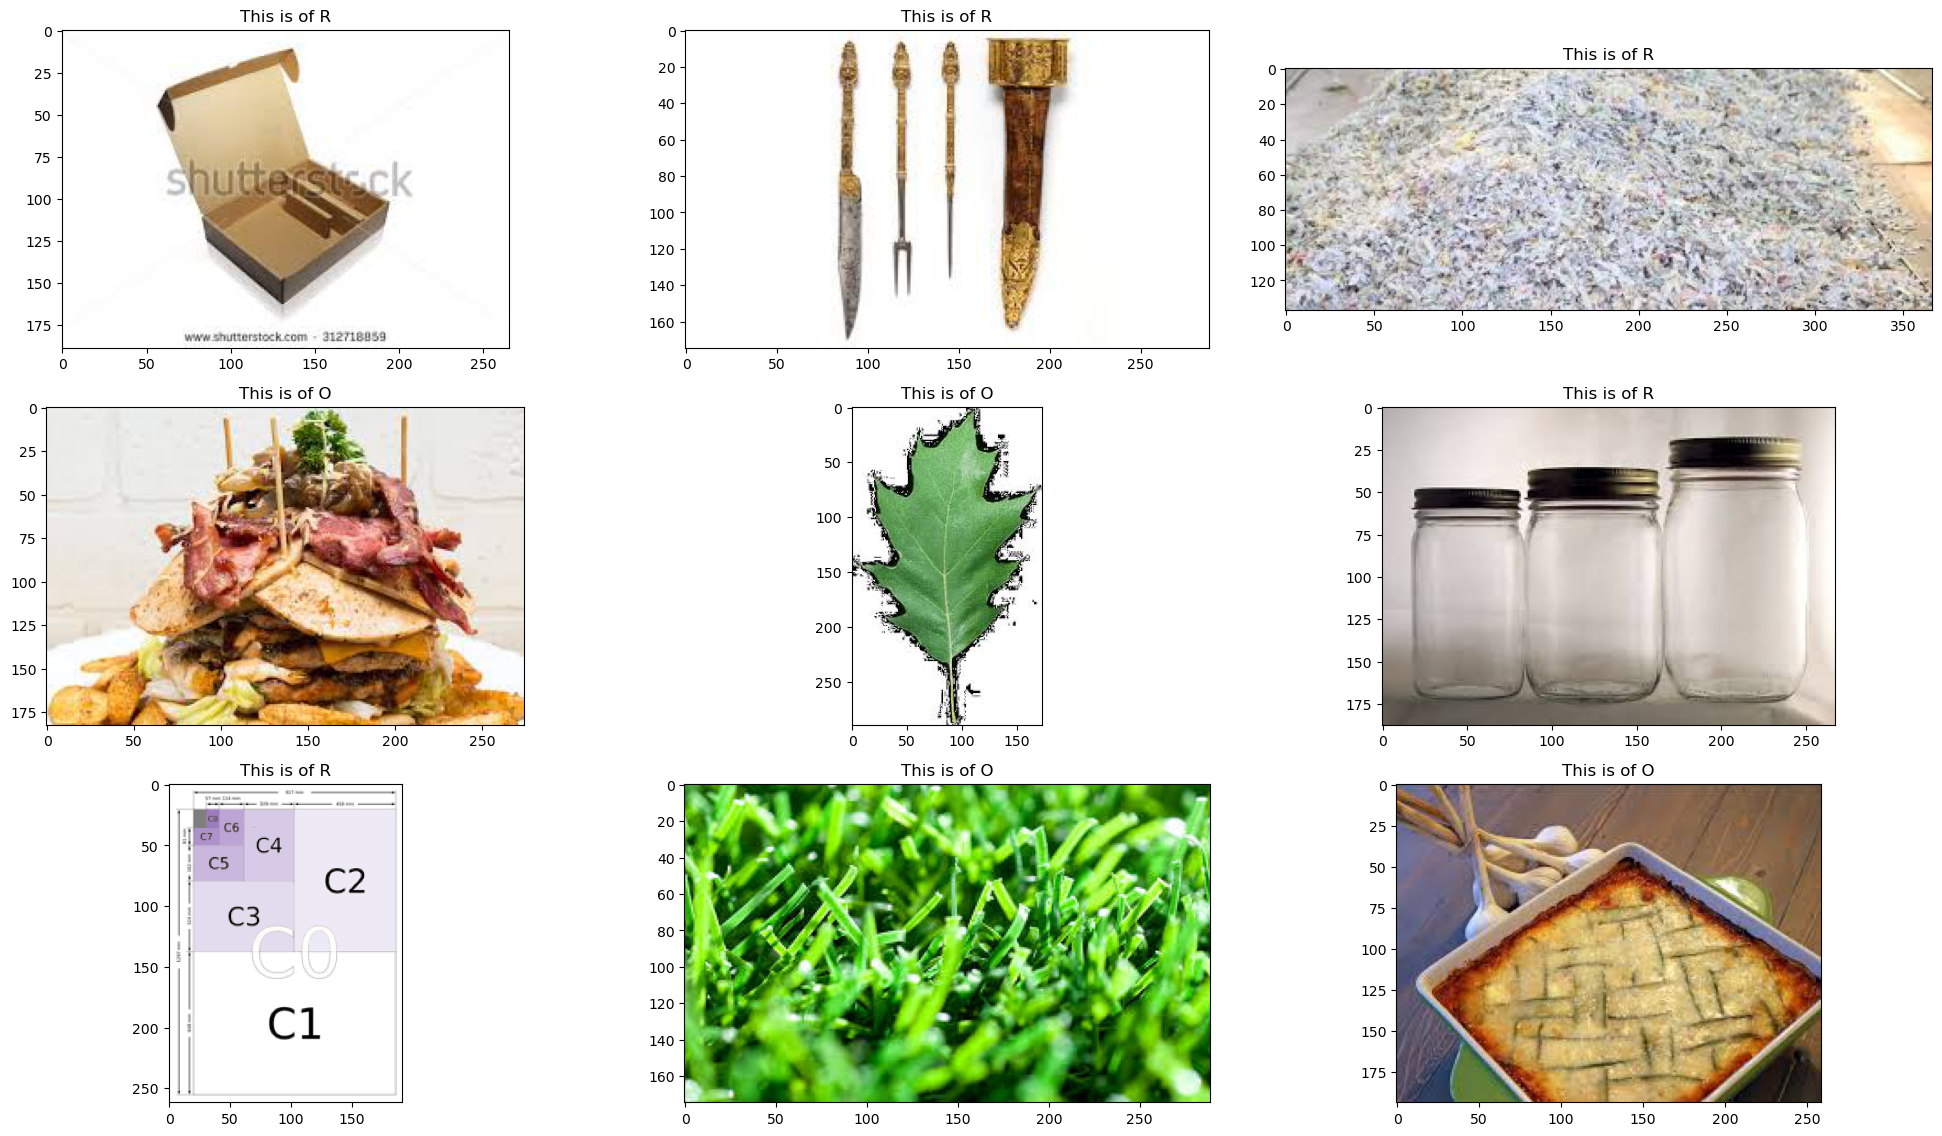

In [15]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### CNN - Convolutional Neural Network

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

2025-02-06 11:50:34.088147: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-02-06 11:50:34.088193: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-06 11:50:34.088198: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-02-06 11:50:34.088540: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-06 11:50:34.088563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


# Previous code block
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Enable eager execution (if needed)
tf.config.run_functions_eagerly(True)

# Define the checkpoint callback to save the best model during training
checkpoint_path = 'best_model.h5'  # File to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',        # Monitor validation loss
    save_best_only=True,       # Save only the best model
    save_weights_only=False,   # Save the entire model (architecture + weights)
    mode='min',                # Minimize validation loss
    verbose=1                  # Print a message when saving
)

# Train the model for 15 epochs with the checkpoint callback
hist = model.fit(
    train_generator,
    epochs=15,                 # Train for 15 epochs
    validation_data=test_generator,
    callbacks=[checkpoint_callback]  # Add the checkpoint callback
)

# Save the final model after training completes
model.save('final_trained_model.h5')

In [45]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Define dataset paths (update if needed)
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

# Load dataset using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Define Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define checkpoint to save best model
checkpoint_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Train model
hist = model.fit(train_generator, epochs=3, validation_data=test_generator, callbacks=[checkpoint_callback])

# Save final trained model
model.save('final_trained_model_v2.h5')


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/3
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7682 - loss: 2.3296
Epoch 1: val_loss improved from inf to 0.42434, saving model to best_model.h5


706/706 ━━━━━━━━━━━━━━━━━━━━ 89s 125ms/step - accuracy: 0.7682 - loss: 2.3276 - val_accuracy: 0.8575 - val_loss: 0.4243
Epoch 2/3
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8822 - loss: 0.3134
Epoch 2: val_loss did not improve from 0.42434
706/706 ━━━━━━━━━━━━━━━━━━━━ 79s 111ms/step - accuracy: 0.8822 - loss: 0.3134 - val_accuracy: 0.8452 - val_loss: 0.4321
Epoch 3/3
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9241 - loss: 0.2125
Epoch 3: val_loss improved from 0.42434 to 0.41052, saving model to best_model.h5


706/706 ━━━━━━━━━━━━━━━━━━━━ 85s 120ms/step - accuracy: 0.9240 - loss: 0.2125 - val_accuracy: 0.8715 - val_loss: 0.4105


In [54]:
import os

# Print the current working directory to verify where the model is saved
print("Current working directory:", os.getcwd())


Current working directory: /content


In [55]:
model.save('/content/final_trained_model_v2.h5')  # Save again to the correct path


# Accuracy and loss check

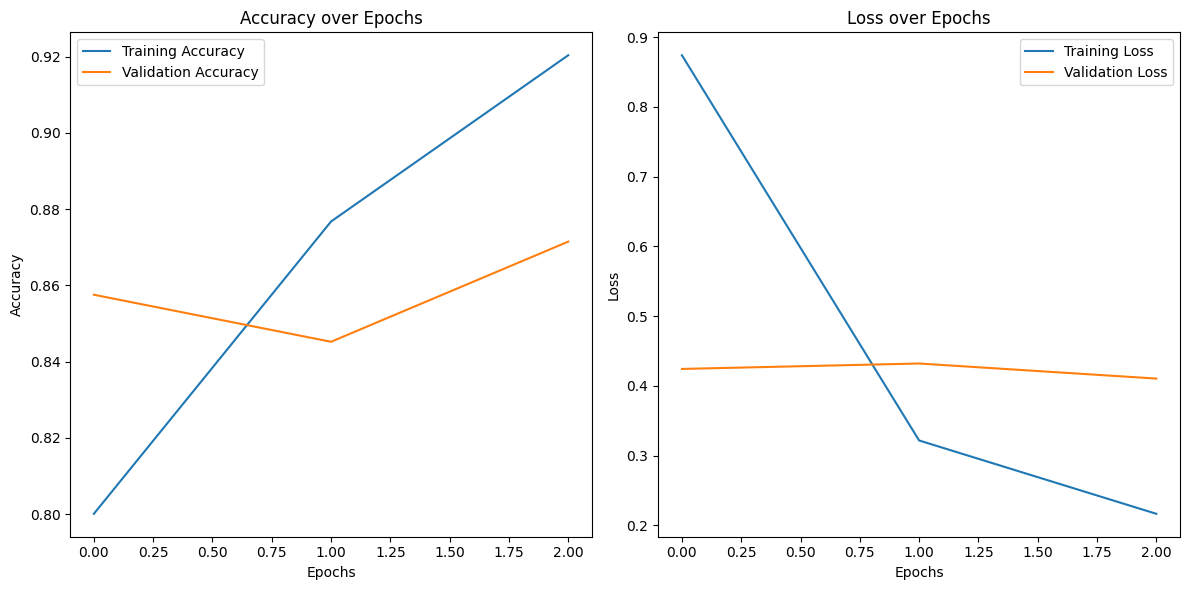

Final Training Accuracy: 0.9204
Final Validation Accuracy: 0.8715
Final Training Loss: 0.2166
Final Validation Loss: 0.4105


In [47]:
import matplotlib.pyplot as plt

# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

for i, metric in enumerate(['accuracy', 'loss']):
    plt.subplot(1, 2, i+1)
    plt.plot(hist.history[metric], label=f'Training {metric.capitalize()}')
    plt.plot(hist.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
    plt.title(f'{metric.capitalize()} over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print(f"Final Training Accuracy: {hist.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")


# Check for Overfitting

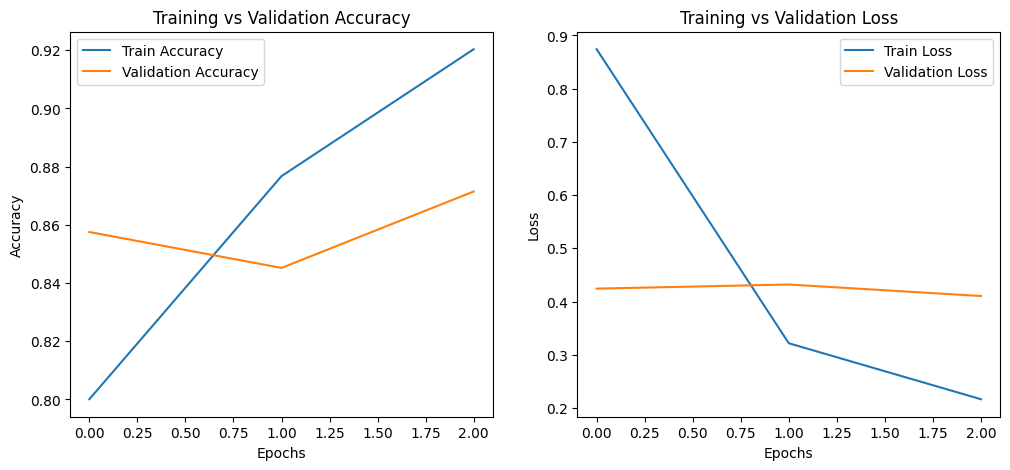

No significant overfitting detected.


In [49]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

# Check for overfitting
train_acc = hist.history['accuracy'][-1]  # Last epoch's train accuracy
val_acc = hist.history['val_accuracy'][-1]  # Last epoch's validation accuracy

if train_acc > val_acc + 0.1:  # If training accuracy is much higher than validation
    print("Potential Overfitting Detected!")
    print(f"Train Accuracy: {train_acc:.2%}, Validation Accuracy: {val_acc:.2%}")
else:
    print("No significant overfitting detected.")


# To save the trained model

In [50]:
model.save('/content/final_trained_model_v2.h5')  # Save the new model with a different name


In [56]:
import shutil

# Move the saved model to /mnt/data/ for easy access
shutil.move('/content/final_trained_model_v2.h5', '/mnt/data/final_trained_model_v2.h5')


'/mnt/data/final_trained_model_v2.h5'

# To download from collab

In [57]:
from google.colab import files

# Download the model
files.download('/mnt/data/final_trained_model_v2.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# To Load Pre Trained Model

In [22]:
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model('/Users/syedsafiullah/Desktop/Online Internships/AI GREEN INTERNSHIP  P4 CNN MODEL TO CLASIFY PLASTIC WASTE/TrashVision-Advanced-CNN-Classification/final_trained_model_v2.h5')

# Print the model summary to verify it loaded correctly
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │    50,466,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,468,100 (192.52 MB)

 Trainable params: 50,468,098 (192.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
def predict_fun(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, (-1, 224, 224, 3))
    result = np.argmax(model.predict(img))
    if result == 0:
        print("The image is of Recyclable Waste")
    elif result == 1:
        print("The image is of Organic Waste")


2025-02-06 12:44:55.566214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
The image is of Organic Waste


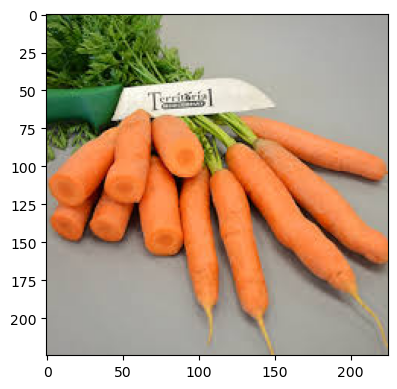

In [34]:
test_img = cv2.imread('/Users/syedsafiullah/Desktop/Online Internships/AI GREEN INTERNSHIP  P4 CNN MODEL TO CLASIFY PLASTIC WASTE/TrashVision-Advanced-CNN-Classification/DATASET/TEST/O/O_12570.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The image is of Organic Waste


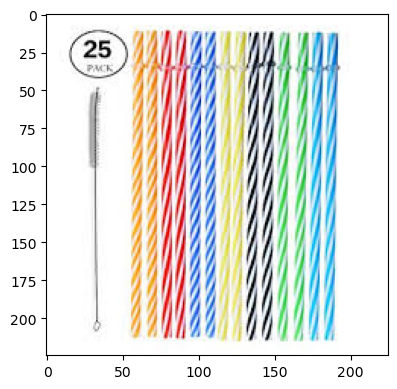

In [41]:
test_img = cv2.imread('/Users/syedsafiullah/Desktop/Online Internships/AI GREEN INTERNSHIP  P4 CNN MODEL TO CLASIFY PLASTIC WASTE/TrashVision-Advanced-CNN-Classification/DATASET/DATASET/TEST/R/R_10472.jpg')
predict_fun(test_img)
